# 5.1 Discrete Distributions

Most random phenomena we encounter fall into a small number of standard patterns. Discrete distributions model situations where outcomes take on distinct, countable values like integers.

---

## 5.1.1 The Discrete Uniform Distribution

The simplest discrete distribution: all outcomes are **equally likely**.

### Definition 5.1: Uniform Random Variable (Discrete)

A random variable has the **discrete uniform distribution** if it takes each of $k$ values with the same probability $\frac{1}{k}$, and all other values with probability zero.

### Examples

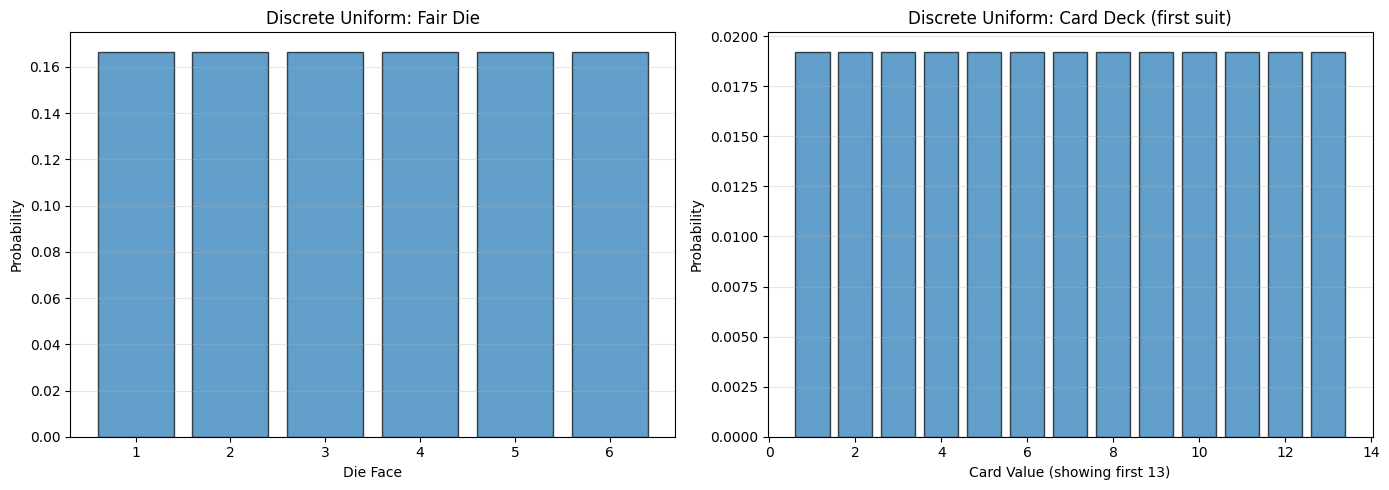

Fair Die:
  Each value: 0.1667 probability
  Mean: 3.50

Card Deck (all 52):
  Each value: 0.0192 probability


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example 1: Fair die
values_die = np.arange(1, 7)
probs_die = np.ones(6) / 6

# Example 2: Card ranks (1-52)
values_card = np.arange(1, 53)
probs_card = np.ones(52) / 52

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(values_die, probs_die, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Die Face')
axes[0].set_ylabel('Probability')
axes[0].set_title('Discrete Uniform: Fair Die')
axes[0].set_xticks(values_die)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(values_card[:13], probs_card[:13], edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Card Value (showing first 13)')
axes[1].set_ylabel('Probability')
axes[1].set_title('Discrete Uniform: Card Deck (first suit)')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Fair Die:")
print(f"  Each value: {probs_die[0]:.4f} probability")
print(f"  Mean: {np.sum(values_die * probs_die):.2f}")
print(f"\nCard Deck (all 52):")
print(f"  Each value: {probs_card[0]:.4f} probability")

**Important Note**: If two random variables have a uniform distribution, their **sum** and **difference** will **NOT** be uniform! (See Chapter 4, Example 4.3)

---

## 5.1.2 Bernoulli Random Variables

A **Bernoulli random variable** models a single trial with two outcomes: success (1) or failure (0).

### Definition 5.2: Bernoulli Random Variable

A **Bernoulli random variable** takes the value $1$ with probability $p$ and $0$ with probability $1-p$.

This is a model for:
- A coin toss (heads/tails)
- A test result (pass/fail)
- A click (yes/no)
- Any binary outcome

### Useful Facts 5.1: Mean and Variance of Bernoulli

A Bernoulli random variable with parameter $p$ has:
1. **Mean**: $p$
2. **Variance**: $p(1-p)$

### Derivation

$$E[X] = 1 \cdot p + 0 \cdot (1-p) = p$$

$$\text{Var}(X) = E[X^2] - (E[X])^2 = p - p^2 = p(1-p)$$

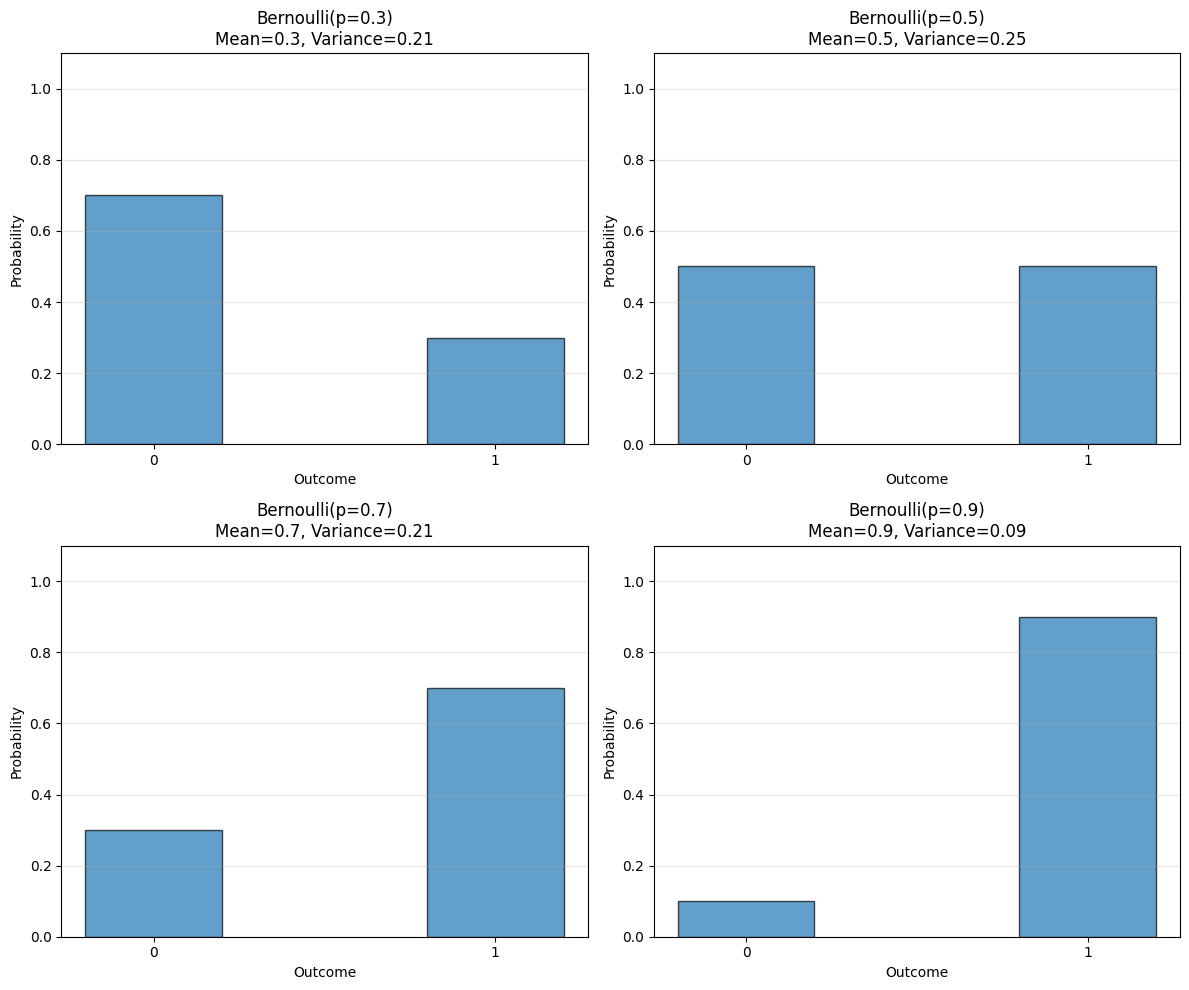

In [2]:
# Bernoulli demonstrations
p_values = [0.3, 0.5, 0.7, 0.9]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, p in enumerate(p_values):
    # PMF
    values = [0, 1]
    probs = [1-p, p]
    
    axes[idx].bar(values, probs, width=0.4, edgecolor='black', alpha=0.7)
    axes[idx].set_xlabel('Outcome')
    axes[idx].set_ylabel('Probability')
    axes[idx].set_title(f'Bernoulli(p={p})\nMean={p:.1f}, Variance={p*(1-p):.2f}')
    axes[idx].set_xticks([0, 1])
    axes[idx].set_ylim([0, 1.1])
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


---

## 5.1.3 The Geometric Distribution

**Question**: How many trials until the first success?

### Motivation

You flip a biased coin with $P(H) = p$ until the first head appears. How many flips did it take?

- To get exactly $n$ flips: need $(n-1)$ tails then 1 head
- Probability: $(1-p)^{n-1} \cdot p$

### Definition 5.3: Geometric Distribution

The **geometric distribution** is a probability distribution on positive integers $n \geq 1$:

$$P(X = n) = (1-p)^{n-1}p$$

where $0 < p \leq 1$ is called the **parameter** of the distribution.

### Useful Facts 5.2: Mean and Variance of Geometric

A geometric distribution with parameter $p$ has:
1. **Mean**: $\frac{1}{p}$
2. **Variance**: $\frac{1-p}{p^2}$

### Examples and Interpretation

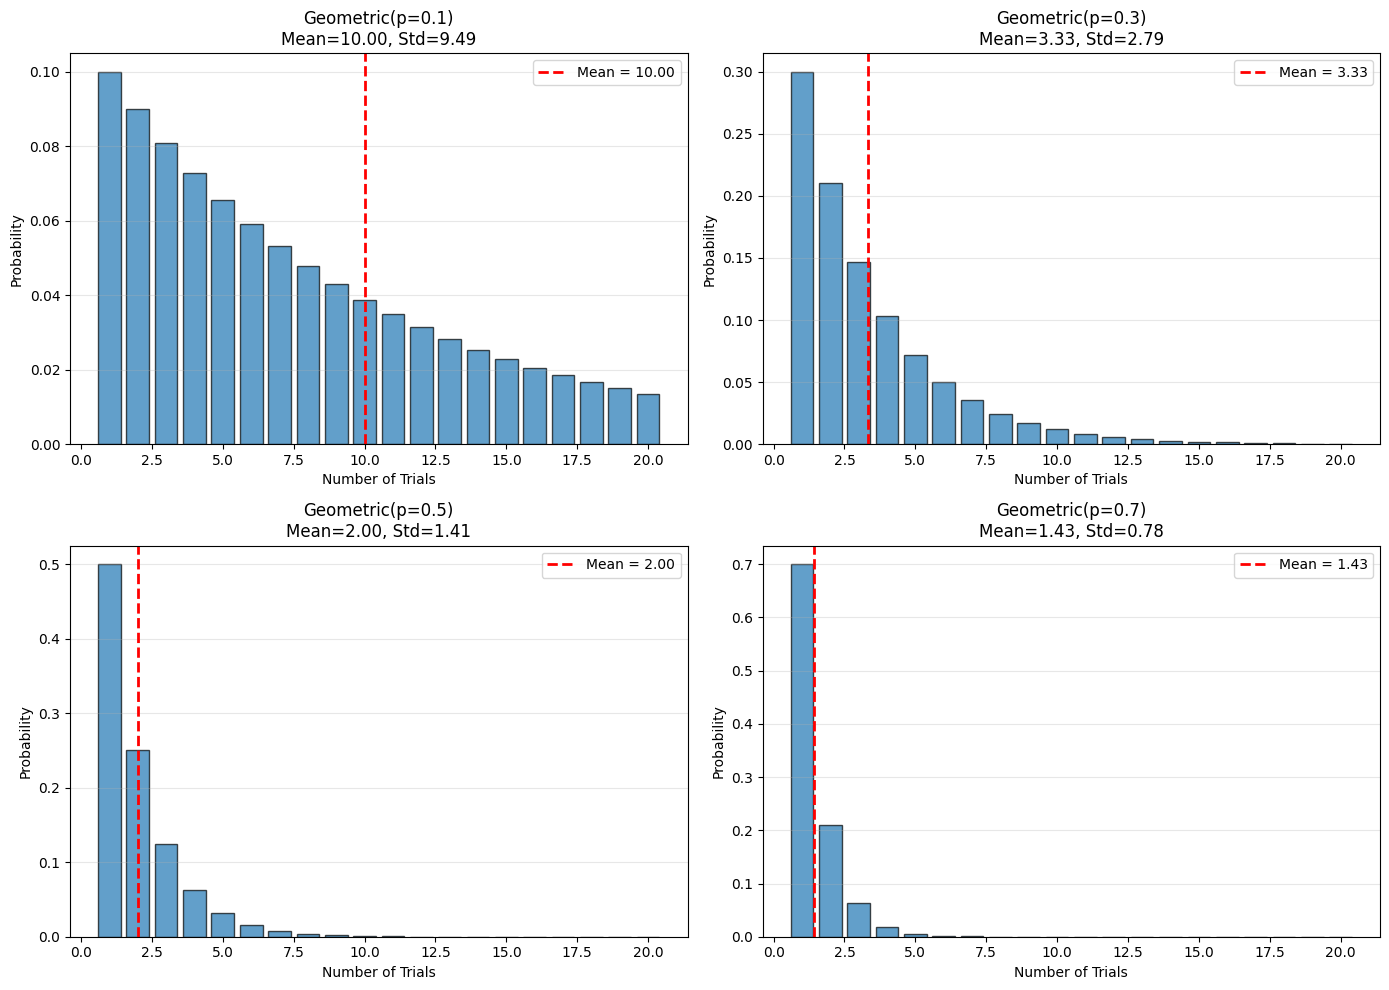

Interpretation:
p=0.1: Average 10.0 trials until first success
p=0.5: Average 2.0 trials until first success
p=0.9: Average 1.1 trials until first success


In [3]:
# Geometric distributions
from scipy.stats import geom

p_values = [0.1, 0.3, 0.5, 0.7]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, p in enumerate(p_values):
    n = np.arange(1, 21)
    probs = geom.pmf(n, p)
    
    mean = 1/p
    var = (1-p)/(p**2)
    
    axes[idx].bar(n, probs, edgecolor='black', alpha=0.7)
    axes[idx].axvline(mean, color='r', linestyle='--', linewidth=2, 
                      label=f'Mean = {mean:.2f}')
    axes[idx].set_xlabel('Number of Trials')
    axes[idx].set_ylabel('Probability')
    axes[idx].set_title(f'Geometric(p={p})\nMean={mean:.2f}, Std={np.sqrt(var):.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Interpretation:")
for p in [0.1, 0.5, 0.9]:
    mean = 1/p
    print(f"p={p}: Average {mean:.1f} trials until first success")

**Key Insight**: The geometric distribution models **waiting times** for first success.

---

## 5.1.4 The Binomial Distribution

**Question**: How many successes in $N$ trials?

### Motivation

Flip a biased coin $N$ times. How many times does it come up heads?

- Number of ways to get $h$ heads in $N$ flips: $\binom{N}{h}$
- Probability of each specific sequence with $h$ heads: $p^h(1-p)^{N-h}$

### Definition 5.4: Binomial Distribution

In $N$ independent repetitions of an experiment with binary outcome:

$$P_b(h; N, p) = \binom{N}{h} p^h (1-p)^{N-h}$$

for $0 \leq h \leq N$, and $P_b(h; N, p) = 0$ otherwise.

### Useful Facts 5.3: Mean and Variance of Binomial

The binomial distribution $P_b(h; N, p)$ has:
1. **Mean**: $Np$
2. **Variance**: $Np(1-p)$

### Proof (Important!)

**Proposition**: The mean of $P_b(h; N, p)$ is $Np$. The variance is $Np(1-p)$.

**Proof**: Write $X$ for a random variable with distribution $P_b(h; N, p)$.

Notice that $X$ can be written as sum of Bernoulli variables:  
$$X = Y_1 + Y_2 + \cdots + Y_N$$

where $Y_i = 1$ if the $i$-th trial is a success, 0 otherwise.

By linearity of expectation:  
$$E[X] = E[Y_1 + \cdots + Y_N] = E[Y_1] + \cdots + E[Y_N] = Np$$

Since the trials are independent:  
$$\text{Var}(X) = \text{Var}(Y_1) + \cdots + \text{Var}(Y_N) = Np(1-p)$$

### Visualization

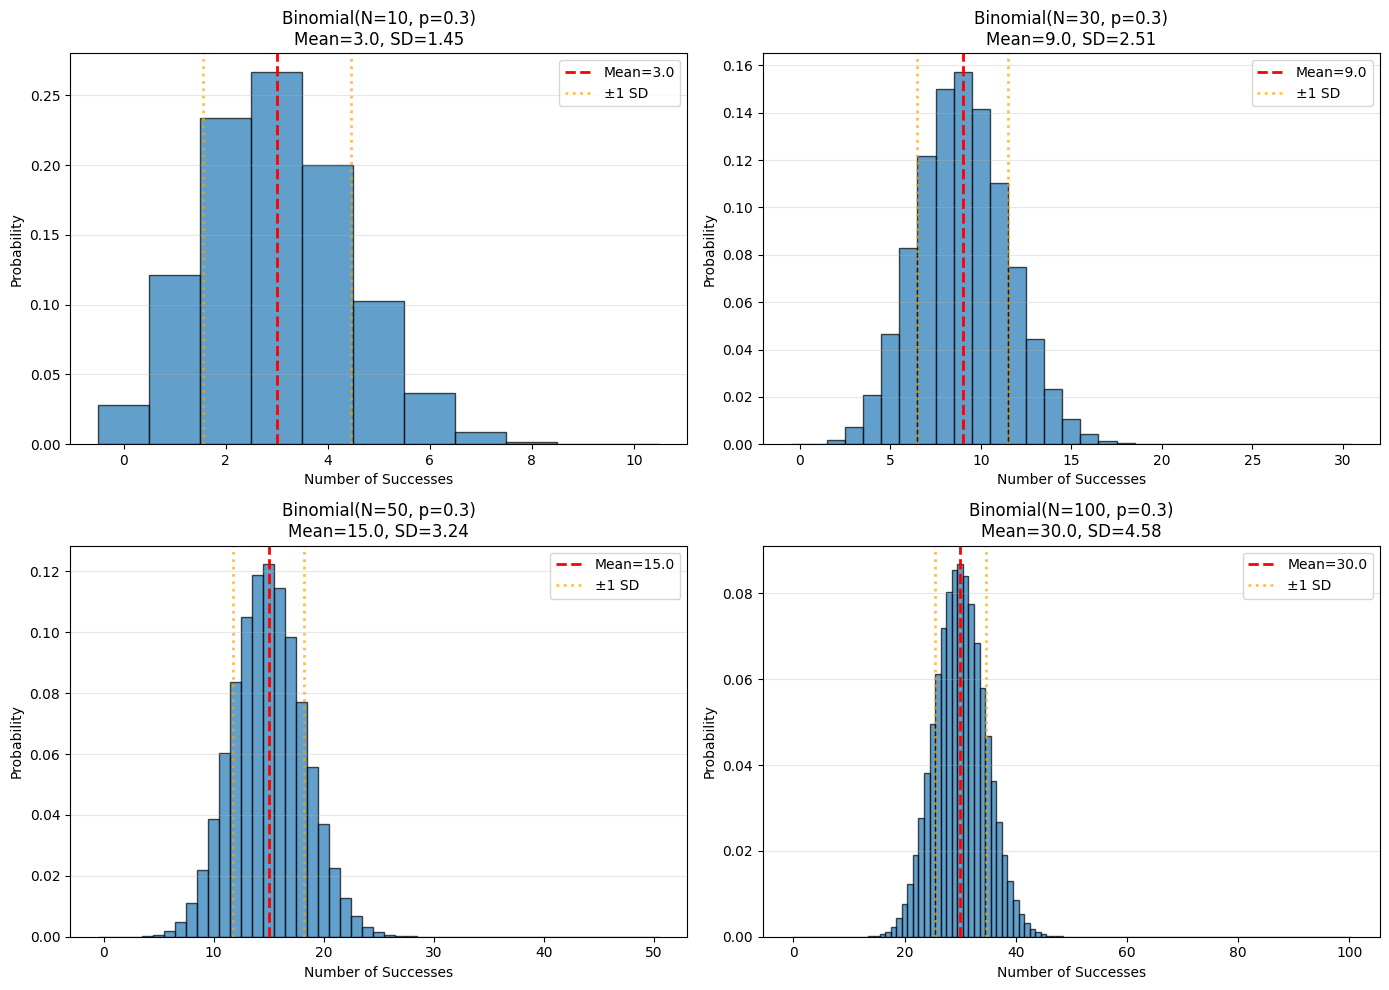

In [4]:
# Binomial distributions
from scipy.stats import binom

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Fix p, vary N
p = 0.3
for idx, N in enumerate([10, 30, 50, 100]):
    ax = axes[idx // 2, idx % 2]
    h = np.arange(0, N+1)
    probs = binom.pmf(h, N, p)
    
    mean = N * p
    std = np.sqrt(N * p * (1-p))
    
    ax.bar(h, probs, edgecolor='black', alpha=0.7, width=1)
    ax.axvline(mean, color='r', linestyle='--', linewidth=2, label=f'Mean={mean:.1f}')
    ax.axvline(mean - std, color='orange', linestyle=':', linewidth=2, alpha=0.7)
    ax.axvline(mean + std, color='orange', linestyle=':', linewidth=2, alpha=0.7, 
               label=f'±1 SD')
    
    ax.set_xlabel('Number of Successes')
    ax.set_ylabel('Probability')
    ax.set_title(f'Binomial(N={N}, p={p})\nMean={mean:.1f}, SD={std:.2f}')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Properties

**Recurrence relation**:
$$P_b(h; N, p) = p \cdot P_b(h-1; N-1, p) + (1-p) \cdot P_b(h; N-1, p)$$

**Symmetry**:
$$P_b(N-i; N, p) = P_b(i; N, 1-p)$$

---

## 5.1.5 Multinomial Probabilities

**Generalization**: What if there are more than 2 outcomes?

### Definition 5.5: Multinomial Distribution

Perform $N$ independent repetitions of an experiment with $k$ possible outcomes. The $i$-th outcome has probability $p_i$.

The probability of observing outcome 1 exactly $n_1$ times, outcome 2 exactly $n_2$ times, ..., outcome $k$ exactly $n_k$ times (where $n_1 + n_2 + \cdots + n_k = N$) is:

$$P_m(n_1, \ldots, n_k; N, p_1, \ldots, p_k) = \frac{N!}{n_1! n_2! \cdots n_k!} p_1^{n_1} p_2^{n_2} \cdots p_k^{n_k}$$

### Example: Die Rolls

In [5]:
from scipy.stats import multinomial

# Roll a fair die 10 times
N = 10
probs = [1/6] * 6  # Fair die

# What's the probability of getting exactly [2,2,2,2,1,1]?
outcome = [2, 2, 2, 2, 1, 1]
prob = multinomial.pmf(outcome, N, probs)

print(f"Rolling a die {N} times:")
print(f"Probability of outcome {outcome}: {prob:.6f}")

# Simulate to verify
np.random.seed(42)
num_sims = 100000
count = 0

for _ in range(num_sims):
    rolls = np.random.choice(range(1, 7), size=N, p=probs)
    counts = [np.sum(rolls == i) for i in range(1, 7)]
    if counts == outcome:
        count += 1

empirical_prob = count / num_sims
print(f"Simulated probability: {empirical_prob:.6f}")

Rolling a die 10 times:
Probability of outcome [2, 2, 2, 2, 1, 1]: 0.003751
Simulated probability: 0.003700


---

## 5.1.6 The Poisson Distribution

**Models**: Counts of rare events occurring at a constant average rate.

### When to Use Poisson

Two key properties:
1. Events occur at some **fixed average rate**
2. Occurrence is **independent** of time since last event

### Definition 5.6: Poisson Distribution

A non-negative, integer-valued random variable $X$ has a **Poisson distribution** when:

$$P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

where $\lambda > 0$ is the **intensity** parameter.

### Useful Facts 5.4: Mean and Variance of Poisson

A Poisson distribution with intensity $\lambda$ has:
1. **Mean**: $\lambda$
2. **Variance**: $\lambda$

Yes, they're the same!

### Classic Examples

- Number of calls to a call center per minute
- Number of Prussian soldiers killed by horse-kicks per year
- Number of typos per page
- Number of insurance claims per month
- Number of emails received per hour

### Visualization

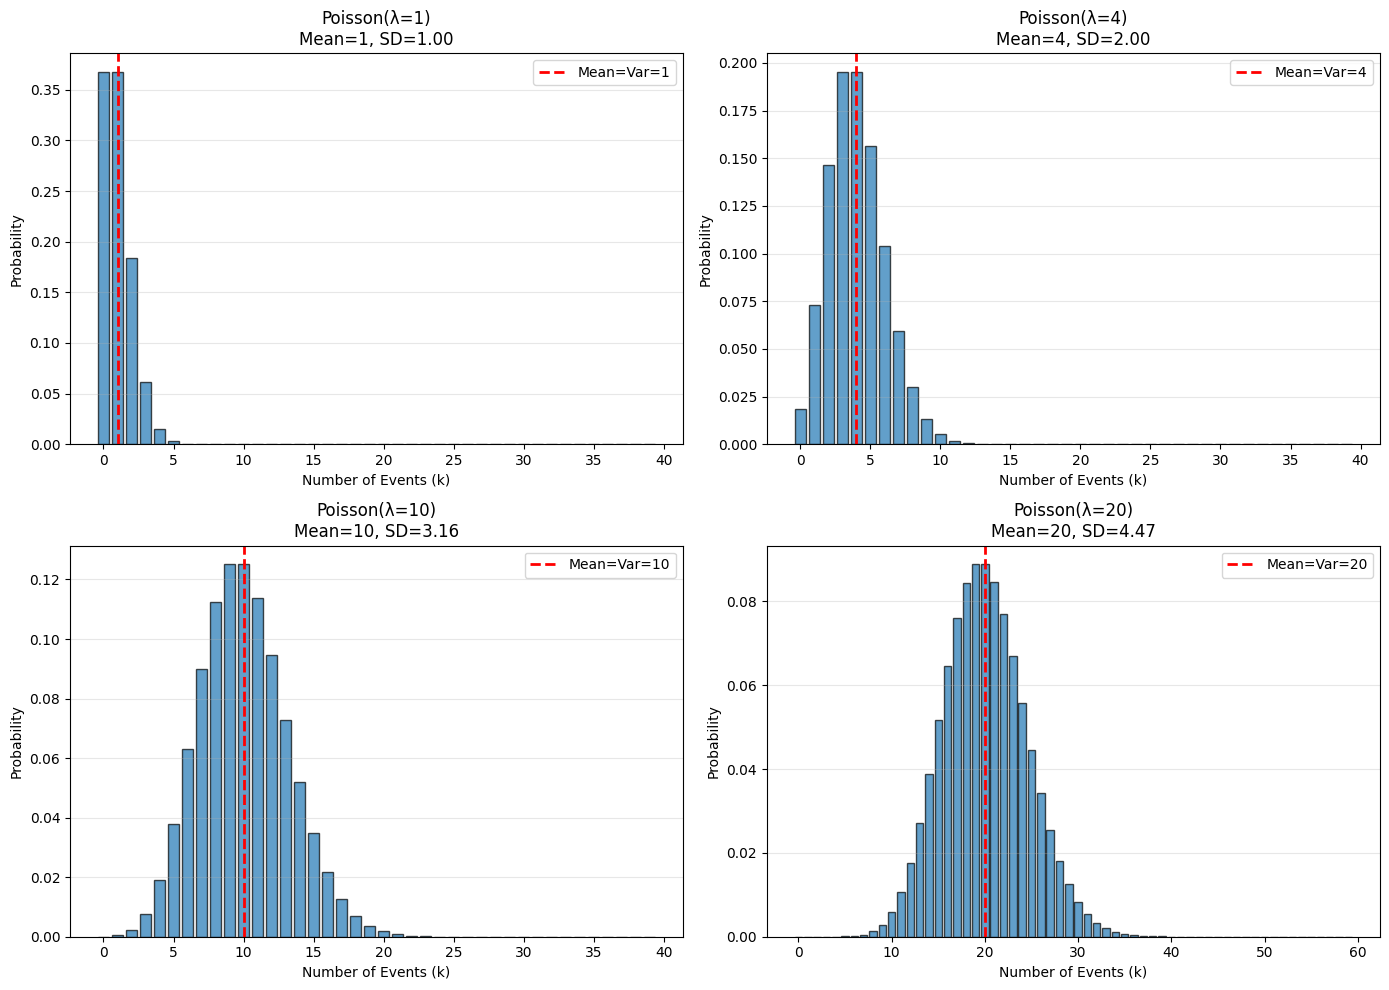

In [6]:
from scipy.stats import poisson

lambdas = [1, 4, 10, 20]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, lam in enumerate(lambdas):
    k = np.arange(0, max(40, int(lam * 3)))
    probs = poisson.pmf(k, lam)
    
    axes[idx].bar(k, probs, edgecolor='black', alpha=0.7)
    axes[idx].axvline(lam, color='r', linestyle='--', linewidth=2, 
                      label=f'Mean=Var={lam}')
    axes[idx].set_xlabel('Number of Events (k)')
    axes[idx].set_ylabel('Probability')
    axes[idx].set_title(f'Poisson(λ={lam})\nMean={lam}, SD={np.sqrt(lam):.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Poisson Point Process

**Spatial Generalization**: A **Poisson point process** with intensity $\lambda$ has:
- Number of points in an interval of length $s$: Poisson($\lambda s$)
- Number of points in an area $A$: Poisson($\lambda \cdot \text{area}(A)$)

**Applications**:
- Roadkill locations on a highway
- Positions of trees in a forest
- Stars in the sky
- Customer arrivals at a store

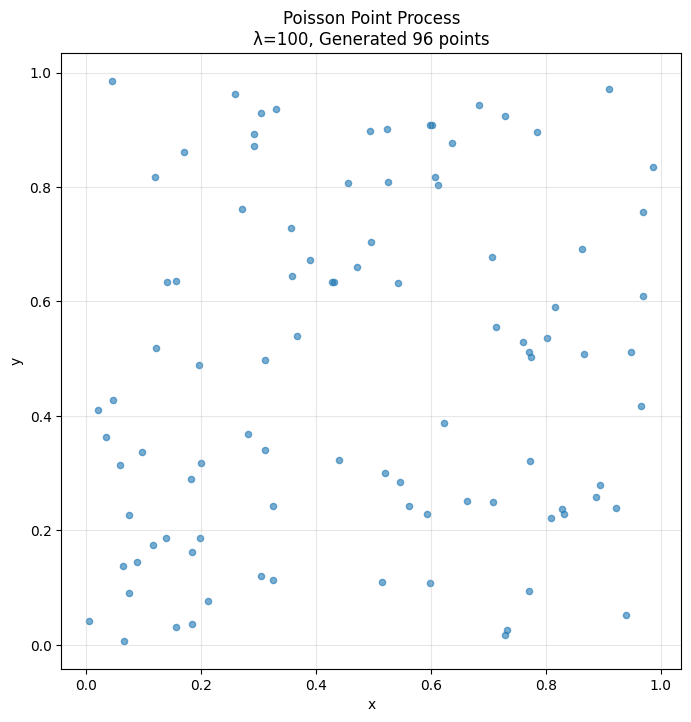

Expected number of points: 100.0
Actually generated: 96


In [7]:
# Simulate Poisson point process in 2D
np.random.seed(42)
lambda_intensity = 100  # points per unit area
area = 1.0  # 1x1 square

# Number of points is Poisson(λ * area)
num_points = np.random.poisson(lambda_intensity * area)

# Positions are uniform in the area
x = np.random.uniform(0, 1, num_points)
y = np.random.uniform(0, 1, num_points)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6, s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Poisson Point Process\nλ={lambda_intensity}, Generated {num_points} points')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print(f"Expected number of points: {lambda_intensity * area}")
print(f"Actually generated: {num_points}")

---

## Summary Table

| Distribution | PMF | Mean | Variance | Used For |
|--------------|-----|------|----------|----------|
| **Discrete Uniform** | $\frac{1}{k}$ | $\frac{k+1}{2}$ (if 1 to k) | varies | Equal probabilities |
| **Bernoulli** | $p^x(1-p)^{1-x}$ | $p$ | $p(1-p)$ | Single trial |
| **Geometric** | $(1-p)^{n-1}p$ | $\frac{1}{p}$ | $\frac{1-p}{p^2}$ | Trials until success |
| **Binomial** | $\binom{N}{k}p^k(1-p)^{N-k}$ | $Np$ | $Np(1-p)$ | Successes in N trials |
| **Multinomial** | $\frac{N!}{n_1!\cdots n_k!}p_1^{n_1}\cdots p_k^{n_k}$ | varies | varies | Multiple outcomes |
| **Poisson** | $\frac{\lambda^k e^{-\lambda}}{k!}$ | $\lambda$ | $\lambda$ | Rare event counts |

---

## Practice Problems

1. You flip a coin with $P(H) = 0.3$ ten times. What's the probability of:
   - Exactly 3 heads?
   - At least 5 heads?
   - The first head appears on the 4th flip?

2. A call center receives an average of 5 calls per minute. What's the probability of:
   - Receiving exactly 3 calls in the next minute?
   - Receiving 10 or more calls in the next minute?
   - Receiving no calls in the next minute?

3. Show that the Poisson distribution sums to 1: $\sum_{k=0}^{\infty} \frac{\lambda^k e^{-\lambda}}{k!} = 1$

4. A die is rolled until a 6 appears. What's the expected number of rolls?

---

## Next Section

Now we'll explore continuous probability distributions!

→ Continue to [5.2 Continuous Distributions](ch05_continuous.md)

→ Return to [Chapter 5 Overview](chapter05.md)